In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

In [61]:
#Data from vizier without treatment
raw_data = pd.read_csv(r"C:\Users\clauw\Documents\Programming\NIR_data_vizier.tsv", delimiter='\t',names=["Wave (cm)", "nFlux", "rFlux"])

In [62]:
#Convert the wavelength in A cause its in cm^-1 
raw_data['Wave A'] = (10**(8))/raw_data['Wave (cm)']

#Invert the values for the index in python
raw_data = raw_data.sort_values('Wave A', ascending=True, na_position='first').reset_index(drop=True)

raw_data

,Wave (cm),nFlux,rFlux,Wave A
0,9999.998732,0.996949,0.134761,10000.001268
1,9999.996849,0.997237,0.134800,10000.003151
2,9999.994966,0.997245,0.134802,10000.005034
3,9999.993083,0.996937,0.134760,10000.006917
4,9999.991199,0.997067,0.134778,10000.008801
...,...,...,...,...
3001255,4347.829323,0.944661,0.015909,22999.982882
3001256,4347.827440,0.938258,0.015800,22999.992845
3001257,4347.825556,0.934484,0.015736,23000.002807
3001258,4347.823673,0.930303,0.015666,23000.012770


In [79]:
#Lines from the excel
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Infrared range\Nave list NIR.xlsx")
raw_lambda['Nave list'] = (10**8)/raw_lambda['lambda']
raw_lambda = raw_lambda[raw_lambda['Nave list'].between(10000,23001,inclusive='neither')]
raw_lambda = raw_lambda[raw_lambda['class']=='A'].reset_index(drop=True)

raw_lambda

,lambda,class,Nave list
0,9977.511,A,10022.539690
1,9975.027,A,10025.035521
2,9971.253,A,10028.829877
3,9964.517,A,10035.609353
4,9955.970,A,10044.224721
...,...,...,...
1849,4378.553,A,22838.595308
1850,4375.952,A,22852.170225
1851,4368.958,A,22888.752879
1852,4354.970,A,22962.270693


### Wavelength classification

In [64]:
#between work like < or > but not the equal, reset the index for the other functions
data_10000_11000 = raw_data[raw_data['Wave A'].between(10000, 11000, inclusive='neither')].reset_index(drop=True)
data_11000_12000 = raw_data[raw_data['Wave A'].between(11000, 12000, inclusive='neither')].reset_index(drop=True)
data_12000_13000 = raw_data[raw_data['Wave A'].between(12000, 13000, inclusive='neither')].reset_index(drop=True)
data_13000_14000 = raw_data[raw_data['Wave A'].between(13000, 14000, inclusive='neither')].reset_index(drop=True)
data_14000_15000 = raw_data[raw_data['Wave A'].between(14000, 15000, inclusive='neither')].reset_index(drop=True)
data_15000_16000 = raw_data[raw_data['Wave A'].between(15000, 16000, inclusive='neither')].reset_index(drop=True)
data_16000_17000 = raw_data[raw_data['Wave A'].between(16000, 17000, inclusive='neither')].reset_index(drop=True)
data_17000_18000 = raw_data[raw_data['Wave A'].between(17000, 18000, inclusive='neither')].reset_index(drop=True)
data_18000_19000 = raw_data[raw_data['Wave A'].between(18000, 19000, inclusive='neither')].reset_index(drop=True)
data_19000_20000 = raw_data[raw_data['Wave A'].between(19000, 20000, inclusive='neither')].reset_index(drop=True)
data_20000_21000 = raw_data[raw_data['Wave A'].between(20000, 21000, inclusive='neither')].reset_index(drop=True)
data_21000_22000 = raw_data[raw_data['Wave A'].between(21000, 22000, inclusive='neither')].reset_index(drop=True)
data_22000_23000 = raw_data[raw_data['Wave A'].between(22000, 23000, inclusive='neither')].reset_index(drop=True)

data_18000_19000

,Wave (cm),nFlux,rFlux,Wave A
0,5555.554433,0.001446,0.000672,18000.003638
1,5555.552549,0.001507,0.000701,18000.009740
2,5555.550666,0.001631,0.000758,18000.015842
3,5555.548783,0.001799,0.000836,18000.021944
4,5555.546900,0.001839,0.000855,18000.028045
...,...,...,...,...
155256,5263.165677,0.001592,0.000689,18999.971905
155257,5263.163794,0.001293,0.000560,18999.978703
155258,5263.161911,0.001108,0.000479,18999.985502
155259,5263.160028,0.001212,0.000524,18999.992300


In [65]:
#Now from lambda
lambda_10000_11000 = raw_lambda[raw_lambda['Nave list'].between(10000, 11000, inclusive='neither')].reset_index(drop=True)
lambda_11000_12000 = raw_lambda[raw_lambda['Nave list'].between(11000, 12000, inclusive='neither')].reset_index(drop=True)
lambda_12000_13000 = raw_lambda[raw_lambda['Nave list'].between(12000, 13000, inclusive='neither')].reset_index(drop=True)
lambda_13000_14000 = raw_lambda[raw_lambda['Nave list'].between(13000, 14000, inclusive='neither')].reset_index(drop=True)
lambda_14000_15000 = raw_lambda[raw_lambda['Nave list'].between(14000, 15000, inclusive='neither')].reset_index(drop=True)
lambda_15000_16000 = raw_lambda[raw_lambda['Nave list'].between(15000, 16000, inclusive='neither')].reset_index(drop=True)
lambda_16000_17000 = raw_lambda[raw_lambda['Nave list'].between(16000, 17000, inclusive='neither')].reset_index(drop=True)
lambda_17000_18000 = raw_lambda[raw_lambda['Nave list'].between(17000, 18000, inclusive='neither')].reset_index(drop=True)
lambda_18000_19000 = raw_lambda[raw_lambda['Nave list'].between(18000, 19000, inclusive='neither')].reset_index(drop=True)
lambda_19000_20000 = raw_lambda[raw_lambda['Nave list'].between(19000, 20000, inclusive='neither')].reset_index(drop=True)
lambda_20000_21000 = raw_lambda[raw_lambda['Nave list'].between(20000, 21000, inclusive='neither')].reset_index(drop=True)
lambda_21000_22000 = raw_lambda[raw_lambda['Nave list'].between(21000, 22000, inclusive='neither')].reset_index(drop=True)
lambda_22000_23000 = raw_lambda[raw_lambda['Nave list'].between(22000, 23000, inclusive='neither')].reset_index(drop=True)


lambda_15000_16000

,lambda,class,Nave list
0,6666.380,A,15000.645028
1,6665.624,A,15002.346367
2,6663.061,A,15008.117140
3,6662.575,A,15009.211904
4,6661.427,A,15011.798523
...,...,...,...
326,6255.828,A,15985.094219
327,6255.299,A,15986.446052
328,6252.921,A,15992.525733
329,6252.815,A,15992.796844


### Find the minimums and the closer line of the Fe I line


In [66]:
#Find the minimum or the lambda in the spectrum
def find_minimums(wave,flux,lamda):
    #The function find_peaks just got the index of the points
    #The minus if for the minimums, without it are the maximums
    minimums,_ = find_peaks(-flux) 
    mindf = pd.DataFrame([]) #Make a dataframe
    mindf['min_wave'] = wave[minimums]
    mindf['min_flux'] = flux[minimums]

    #Take the closer line with the absolute value of the difference between the minimums and the line
    #This step dont include the closer points that are not minimums
    closer = []
    for each in lamda:
        mindf['abs'] = np.abs(mindf['min_wave']-each)
        closer.append(mindf.loc[mindf['abs'] == min(mindf['abs'])]) #take all the row

    #Dataframe with the marks for the closer lines of Fe
    closer_data = pd.concat(closer,axis=0).reset_index(drop=True)
    closer_data['Fe line'] = lamda
    closer_data = closer_data[closer_data['abs'] <= 0.025].reset_index(drop=True)

    return closer_data.drop(['abs'],axis=1)

#Closer lines
closer_lines_10000_11000 = find_minimums(data_10000_11000['Wave A'],data_10000_11000['nFlux'],lambda_10000_11000['Nave list'])
closer_lines_11000_12000 = find_minimums(data_11000_12000['Wave A'],data_11000_12000['nFlux'],lambda_11000_12000['Nave list'])
closer_lines_12000_13000 = find_minimums(data_12000_13000['Wave A'],data_12000_13000['nFlux'],lambda_12000_13000['Nave list'])
closer_lines_13000_14000 = find_minimums(data_13000_14000['Wave A'],data_13000_14000['nFlux'],lambda_13000_14000['Nave list'])
closer_lines_14000_15000 = find_minimums(data_14000_15000['Wave A'],data_14000_15000['nFlux'],lambda_14000_15000['Nave list'])
closer_lines_15000_16000 = find_minimums(data_15000_16000['Wave A'],data_15000_16000['nFlux'],lambda_15000_16000['Nave list'])
closer_lines_16000_17000 = find_minimums(data_16000_17000['Wave A'],data_16000_17000['nFlux'],lambda_16000_17000['Nave list'])
closer_lines_17000_18000 = find_minimums(data_17000_18000['Wave A'],data_17000_18000['nFlux'],lambda_17000_18000['Nave list'])
closer_lines_18000_19000 = find_minimums(data_18000_19000['Wave A'],data_18000_19000['nFlux'],lambda_18000_19000['Nave list'])
closer_lines_19000_20000 = find_minimums(data_19000_20000['Wave A'],data_19000_20000['nFlux'],lambda_19000_20000['Nave list'])
closer_lines_20000_21000 = find_minimums(data_20000_21000['Wave A'],data_20000_21000['nFlux'],lambda_20000_21000['Nave list'])
closer_lines_21000_22000 = find_minimums(data_21000_22000['Wave A'],data_21000_22000['nFlux'],lambda_21000_22000['Nave list'])
closer_lines_22000_23000 = find_minimums(data_22000_23000['Wave A'],data_22000_23000['nFlux'],lambda_22000_23000['Nave list'])

closer_lines_16000_17000

,min_wave,min_flux,Fe line
0,16002.106294,0.795217,16002.099475
1,16002.776641,0.973520,16002.760156
2,16011.153476,0.626058,16011.130938
3,16012.471599,0.073436,16012.453846
4,16013.992779,0.666332,16013.989822
...,...,...,...
156,16946.846703,0.980213,16946.837432
157,16952.305804,0.977721,16952.316017
158,16956.409206,0.971669,16956.417936
159,16960.687954,0.979833,16960.682932


In [147]:
#Localize the line and save the width for lines
def width_minimums(closer_lines,data,width):
    local_points =[]
    for each in closer_lines['min_wave']:
        #This append all the part of the dataframe in that range
        local_points.append(data[data['Wave A'].between(each-width, each+width, inclusive='neither')])

    return local_points

#Data
local_points_10000_11000 = width_minimums(closer_lines_10000_11000,data_10000_11000,0.3)
local_points_11000_12000 = width_minimums(closer_lines_11000_12000,data_11000_12000,0.05)
local_points_12000_13000 = width_minimums(closer_lines_12000_13000,data_12000_13000,0.05)
local_points_13000_14000 = width_minimums(closer_lines_13000_14000,data_13000_14000,0.05)
local_points_14000_15000 = width_minimums(closer_lines_14000_15000,data_14000_15000,0.05)
local_points_15000_16000 = width_minimums(closer_lines_15000_16000,data_15000_16000,0.05)
local_points_16000_17000 = width_minimums(closer_lines_16000_17000,data_16000_17000,0.05)
local_points_17000_18000 = width_minimums(closer_lines_17000_18000,data_17000_18000,0.05)
local_points_18000_19000 = width_minimums(closer_lines_18000_19000,data_18000_19000,0.05)
local_points_19000_20000 = width_minimums(closer_lines_19000_20000,data_19000_20000,0.05)
local_points_20000_21000 = width_minimums(closer_lines_20000_21000,data_20000_21000,0.05)
local_points_21000_22000 = width_minimums(closer_lines_21000_22000,data_21000_22000,0.05)
local_points_22000_23000 = width_minimums(closer_lines_22000_23000,data_22000_23000,0.05)

local_points_16000_17000

[       Wave (cm)     nFlux     rFlux        Wave A
 426  6249.196170  0.805723  0.425015  16002.058070
 427  6249.194287  0.803727  0.423962  16002.062892
 428  6249.192403  0.801747  0.422917  16002.067714
 429  6249.190520  0.800089  0.422042  16002.072537
 430  6249.188637  0.798860  0.421394  16002.077359
 431  6249.186754  0.797834  0.420853  16002.082182
 432  6249.184870  0.796983  0.420404  16002.087004
 433  6249.182987  0.796431  0.420113  16002.091826
 434  6249.181104  0.795970  0.419870  16002.096649
 435  6249.179221  0.795485  0.419614  16002.101471
 436  6249.177337  0.795217  0.419472  16002.106294
 437  6249.175454  0.795342  0.419538  16002.111116
 438  6249.173571  0.795774  0.419766  16002.115939
 439  6249.171687  0.796466  0.420131  16002.120761
 440  6249.169804  0.797459  0.420655  16002.125584
 441  6249.167921  0.798628  0.421271  16002.130406
 442  6249.166038  0.799949  0.421968  16002.135228
 443  6249.164154  0.801579  0.422828  16002.140051
 444  6249.1

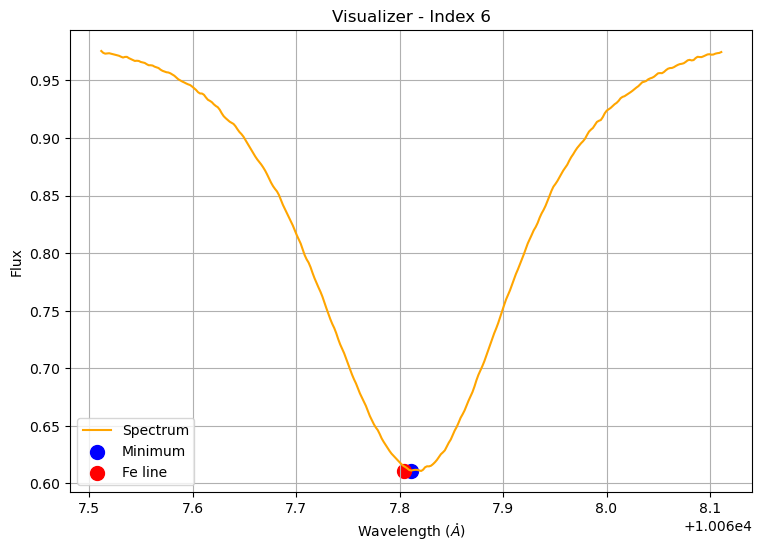

In [148]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import numpy as np

class OutlierViewer:
    def __init__(self, root, local_points, closer_line):
        self.root = root
        self.root.title("Visualizador Interactivo")
        self.local_points = local_points
        self.closer_line = closer_line
        self.index = closer_line.index.values
        self.current_index = 0
       
        self.setup_ui()
        self.update_plot()
    
    def setup_ui(self):
        main_frame = ttk.Frame(self.root, padding="10")
        main_frame.pack(fill=tk.BOTH, expand=True)
        
        control_frame = ttk.Frame(main_frame)
        control_frame.pack(fill=tk.X, pady=10)
        
        ttk.Label(control_frame, text="Índice de Outlier:").pack(side=tk.LEFT, padx=5)
        self.slider = ttk.Scale(
            control_frame,
            from_=0,
            to=len(self.index)-1,
            orient=tk.HORIZONTAL,
            command=self.on_slider_move
        )
        self.slider.pack(side=tk.LEFT, expand=True, fill=tk.X, padx=5)
        
        self.spinbox = ttk.Spinbox(
            control_frame,
            from_=0,
            to=len(self.index)-1,
            width=5,
            command=self.on_spinbox_change
        )
        self.spinbox.pack(side=tk.LEFT, padx=5)
        self.spinbox.bind("<Return>", self.on_spinbox_change)
        
        nav_frame = ttk.Frame(control_frame)
        nav_frame.pack(side=tk.LEFT, padx=10)
        
        ttk.Button(nav_frame, text="← Anterior", command=self.prev_plot).pack(side=tk.LEFT)
        ttk.Button(nav_frame, text="Siguiente →", command=self.next_plot).pack(side=tk.LEFT, padx=5)
     
        graph_frame = ttk.Frame(main_frame)
        graph_frame.pack(fill=tk.BOTH, expand=True)
       
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, master=graph_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
        self.toolbar = NavigationToolbar2Tk(self.canvas, graph_frame)
        self.toolbar.update()
        self.canvas._tkcanvas.pack(fill=tk.BOTH, expand=True)
    
    def on_slider_move(self, event=None):
        self.current_index = int(float(self.slider.get()))
        self.spinbox.delete(0, tk.END)
        self.spinbox.insert(0, str(self.current_index))
        self.update_plot()
    
    def on_spinbox_change(self, event=None):
        try:
            new_index = int(self.spinbox.get())
            if 0 <= new_index < len(self.index):
                self.current_index = new_index
                self.slider.set(self.current_index)
                self.update_plot()
        except ValueError:
            pass
    
    def prev_plot(self):
        if self.current_index > 0:
            self.current_index -= 1
            self.slider.set(self.current_index)
            self.spinbox.delete(0, tk.END)
            self.spinbox.insert(0, str(self.current_index))
            self.update_plot()
    
    def next_plot(self):
        if self.current_index < len(self.index)-1:
            self.current_index += 1
            self.slider.set(self.current_index)
            self.spinbox.delete(0, tk.END)
            self.spinbox.insert(0, str(self.current_index))
            self.update_plot()
    
    #Graficas
    def update_plot(self):
        j = self.current_index
        self.ax.clear()
        
        # Gráfica principal
        self.ax.plot(
            self.local_points[j]['Wave A'],
            self.local_points[j]['nFlux'],
            color='orange',
            label='Spectrum'
        )
        
        #Closer lines
        self.ax.scatter(
            self.closer_line['min_wave'][j],
            self.closer_line['min_flux'][j],
            color='blue',
            label='Minimum',
            s = 100,
        )
        
        #Puntos de la lista de Fe
        self.ax.scatter(
            self.closer_line['Fe line'][j],
            self.closer_line['min_flux'][j],
            color='red',
            label='Fe line',
            s=100
        )
        
        #Vainitas del gráfico
        self.ax.set_title(f'Visualizer - Index {self.index[j]}')
        self.ax.set_xlabel(r'Wavelength $(\mathring{A})$')
        self.ax.set_ylabel('Flux')
        self.ax.legend()
        self.ax.grid(True)
        
        self.canvas.draw()


if __name__ == "__main__":
    root = tk.Tk()
    root.geometry("900x700")

    app = OutlierViewer(root, local_points_10000_11000, closer_lines_10000_11000)

    root.mainloop()

## Lines to drop in the excel

In [ ]:
index_to_drop_10000_11000 = np.concatenate([closer_lines_10000_11000.index.values,np.array([1,12,18,22,42,55,61,63,70,75,76,77])])
index_to_mantain_10000_11000 = index_to_drop_10000_11000[ np.bincount(index_to_drop_10000_11000)[index_to_drop_10000_11000] != 2]

index_to_drop_11000_12000 = np.concatenate([closer_lines_11000_12000.index.values,np.array([2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25,26,
                            28,29,30,32,33,34,41,43,44,45,47,51,53])])
index_to_mantain_11000_12000 = index_to_drop_11000_12000[ np.bincount(index_to_drop_11000_12000)[index_to_drop_11000_12000] != 2]
 

index_to_drop_12000_13000 = np.concatenate([closer_lines_12000_13000.index.values,np.array([0,3,4,7,8,12,13,15,16,19,20,24,25,26,29,31,34,35,39,40,42,
                             43,49,50,53,55,58,60,63,64])])
index_to_mantain_12000_13000 = index_to_drop_12000_13000[ np.bincount(index_to_drop_12000_13000)[index_to_drop_12000_13000] != 2]

index_to_mantain_13000_14000 = np.array([0,1,5,8,11,12,13,15,20,91])

index_to_mantain_14000_15000 = np.array([33,49,57,62,63,68,73,76,77,79,80,82,90,91,94,95,98,99,101,102,103,104,105])

index_to_drop_15000_16000 = np.concatenate([closer_lines_15000_16000.index.values,np.array([0,2,4,6,7,8,10,13,21,22,27,29,33,40,43,44,45,53,55,60,63,65,67,
                             74,76,84,92,94,95,102,107,112,117,123,124,125,128,130,132,134,
                             144,152,160,162,165,170,171,
                             172,176,180,186])]) 
index_to_mantain_15000_16000 = index_to_drop_15000_16000[ np.bincount(index_to_drop_15000_16000)[index_to_drop_15000_16000] != 2]

index_to_drop_16000_17000 = np.concatenate([closer_lines_16000_17000.index.values,np.array([1,5,6,13,18,21,23,30,31,35,46,51,55,58,59,64,67,69,75,81,
                             87,90,93,95,96,97,98,100,101,103,106,114,115,116,117,121,
                             126,127,129,132,136,137,138,140,142,147,148,150,151,155,
                             156,157])])
index_to_mantain_16000_17000 = index_to_drop_16000_17000[ np.bincount(index_to_drop_16000_17000)[index_to_drop_16000_17000] != 2]

index_to_drop_17000_18000 = np.concatenate([closer_lines_17000_18000.index.values,np.array([4,10,12,14,15,17,18,22,25,28,29,31,38,39,
                                                                                            41,46,49,51,55,61,62,68,70,71,72,74,76,78,80,81,85])])
index_to_mantain_17000_18000 = index_to_drop_17000_18000[ np.bincount(index_to_drop_17000_18000)[index_to_drop_17000_18000] != 2]

index_to_mantain_18000_19000 =  np.array([12,14,23,26,30,44,53,56,57,76,90,103,104,106,129,131])

index_to_mantain_19000_20000 = np.array([0,1,2,21,23,34,37,40,42,45,46,47,48,49,50,52,53])

index_to_drop_20000_21000 = np.concatenate([closer_lines_20000_21000.index.values,np.array([0,1,3,7,10,11])])
index_to_mantain_20000_21000 = index_to_drop_20000_21000[ np.bincount(index_to_drop_20000_21000)[index_to_drop_20000_21000] != 2]

index_to_drop_21000_22000 = np.concatenate([closer_lines_21000_22000.index.values,np.array([2,3,5,6,8,9,12,13,14])])
index_to_mantain_21000_22000 = index_to_drop_21000_22000[ np.bincount(index_to_drop_21000_22000)[index_to_drop_21000_22000] != 2]

index_to_drop_22000_23000 = np.concatenate([closer_lines_22000_23000.index.values,np.array([1,3,4,5,6,8,10,11,12,13,17,18])])
index_to_mantain_22000_23000 = index_to_drop_22000_23000[ np.bincount(index_to_drop_22000_23000)[index_to_drop_22000_23000] != 2]

#Take the different list to convert a excel
list_drop_lines =pd.DataFrame( np.concatenate([closer_lines_10000_11000.take(index_to_mantain_10000_11000)['Fe line'],
                                  closer_lines_11000_12000.take(index_to_mantain_11000_12000)['Fe line'],
                                  closer_lines_12000_13000.take(index_to_mantain_12000_13000)['Fe line'],
                                  closer_lines_13000_14000.take(index_to_mantain_13000_14000)['Fe line'],
                                  closer_lines_14000_15000.take(index_to_mantain_14000_15000)['Fe line'],
                                  closer_lines_15000_16000.take(index_to_mantain_15000_16000)['Fe line'],
                                  closer_lines_16000_17000.take(index_to_mantain_16000_17000)['Fe line'],
                                  closer_lines_17000_18000.take(index_to_mantain_17000_18000)['Fe line'],
                                  closer_lines_18000_19000.take(index_to_mantain_18000_19000)['Fe line'],
                                  closer_lines_19000_20000.take(index_to_mantain_19000_20000)['Fe line'],
                                  closer_lines_20000_21000.take(index_to_mantain_20000_21000)['Fe line'],
                                  closer_lines_21000_22000.take(index_to_mantain_21000_22000)['Fe line'],
                                  closer_lines_22000_23000.take(index_to_mantain_22000_23000)['Fe line'],

                                    ]))

list_drop_lines

#Convert to excel
# list_drop_lines.to_excel('valores vacio Nave NIR.xlsx', index=False)
